C:\Users\PC\AppData\Local\Temp\ipykernel_14580\246631455.py:35: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  'Transporte y Servicios': DatosIPC[DatosIPC.index.str.contains(r'(Transporte|Comunicaciones|Salud|Alojamiento)', case=False)],  # Filtra por palabras clave
C:\Users\PC\AppData\Local\Temp\ipykernel_14580\246631455.py:36: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  'Educacion y Cultura': DatosIPC[DatosIPC.index.str.contains(r'(Educación|Recreación)', case=False)],  # Filtra por palabras clave
C:\Users\PC\AppData\Local\Temp\ipykernel_14580\246631455.py:37: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  'Otros Bienes y Servicios': DatosIPC[DatosIPC.index.str.contains(r'(Restaurantes|Bienes y servicios diversos)', case=

Guardado: Indice_General_y_Subgrupos_Principales.csv
Graficando: Indice General y Subgrupos Principales con gráfico tipo lineplot


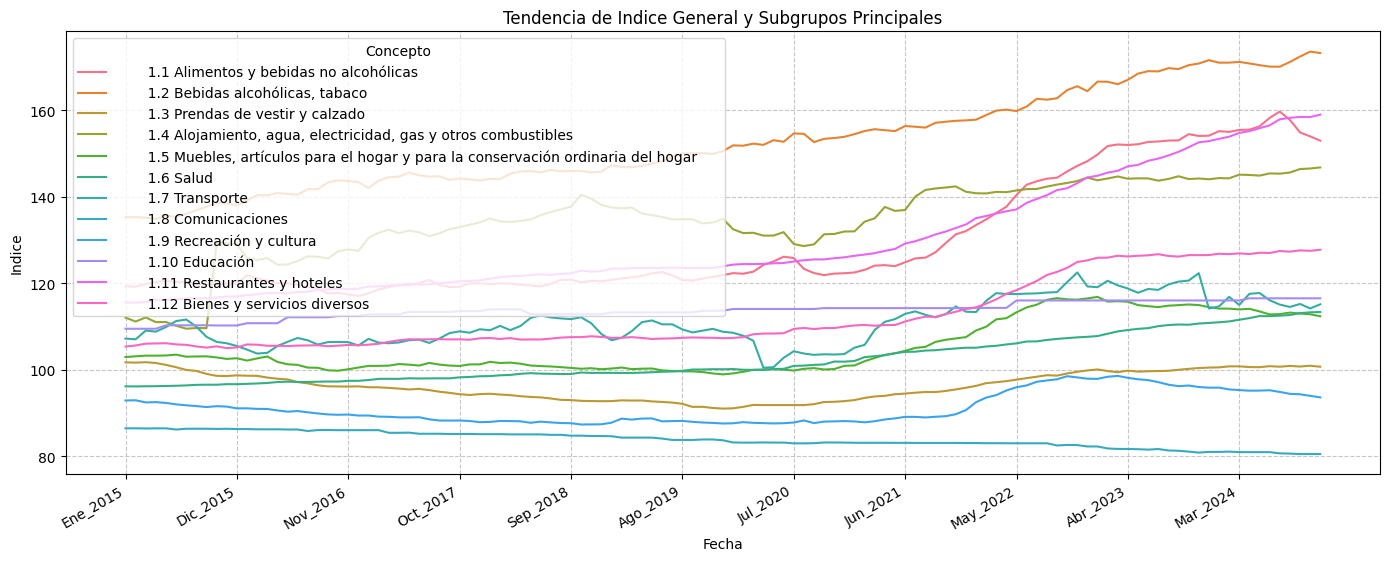

Guardado: Transporte_y_Servicios.csv
Graficando: Transporte y Servicios con gráfico tipo scatter


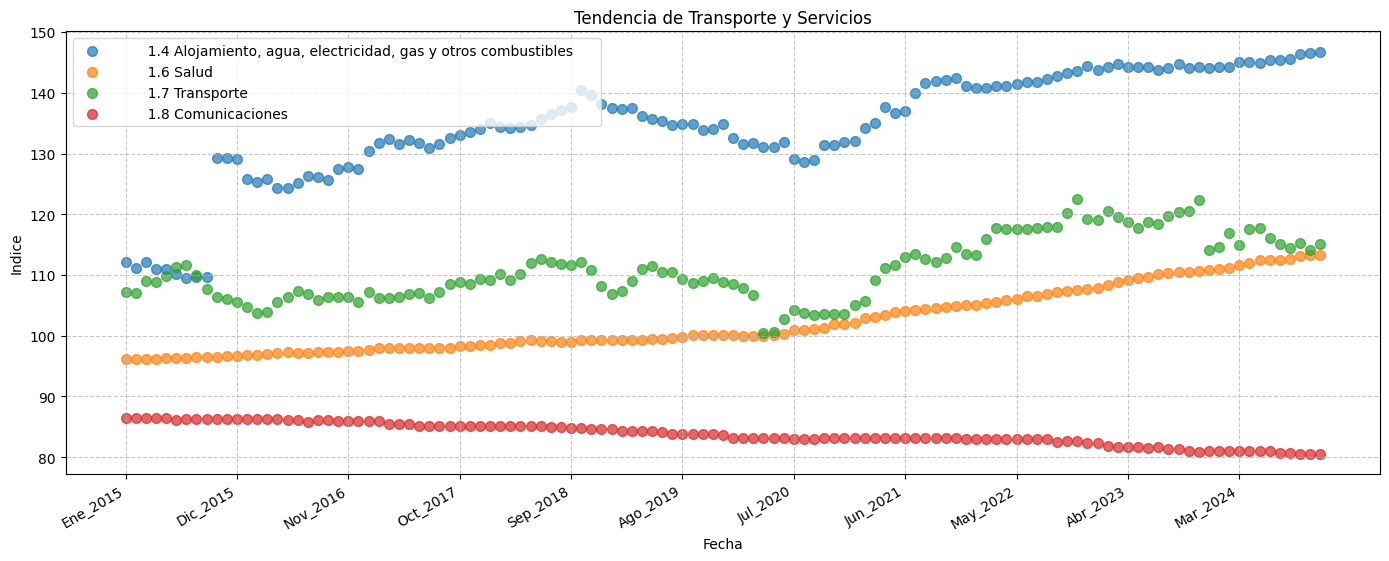

Guardado: Educacion_y_Cultura.csv
Graficando: Educacion y Cultura con gráfico tipo area


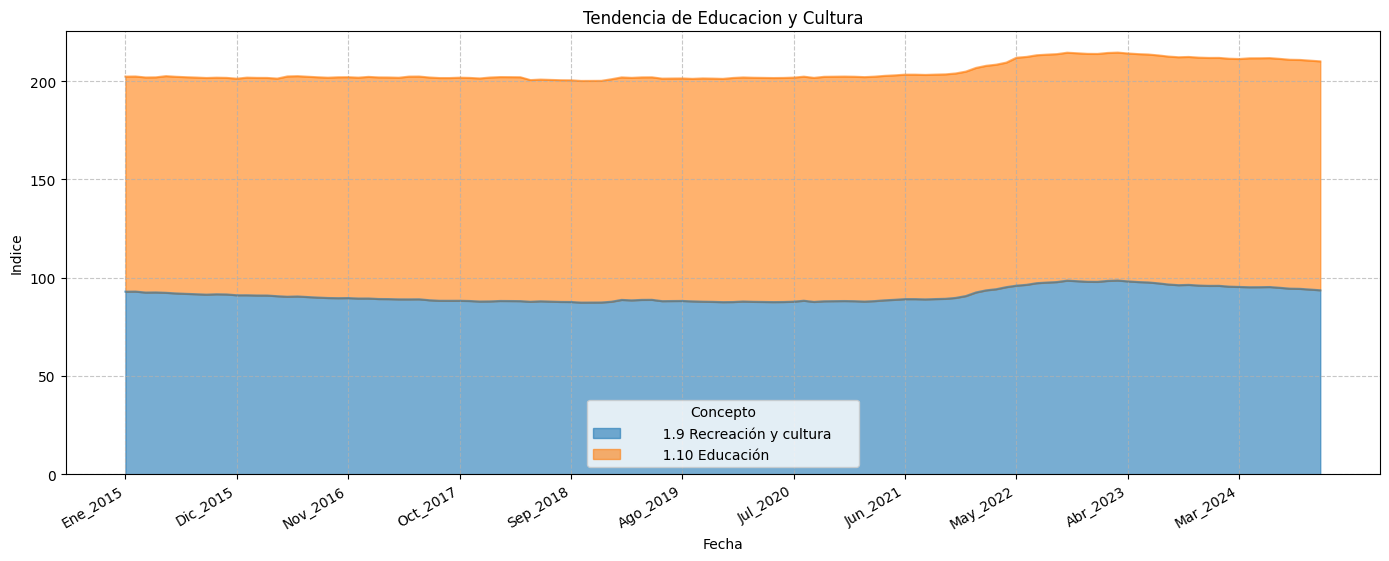

Guardado: Otros_Bienes_y_Servicios.csv
Graficando: Otros Bienes y Servicios con gráfico tipo scatter


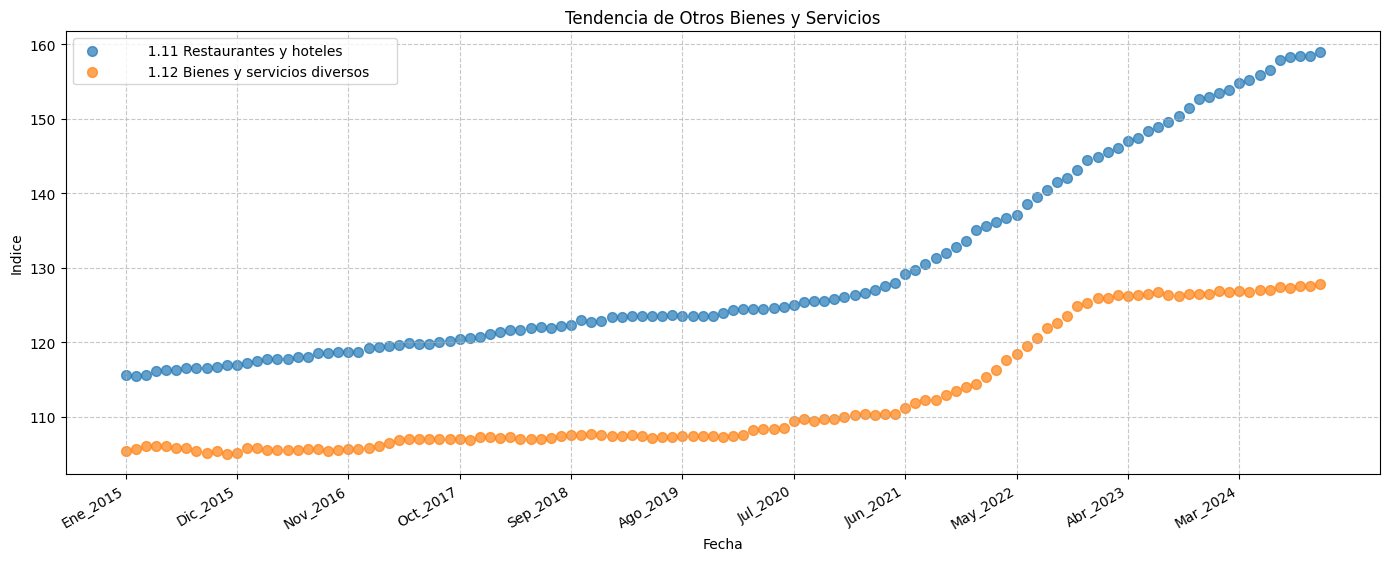

In [5]:
import pandas as pd  # Importa la librería para manejar y procesar datos en formato tabular
import matplotlib.pyplot as plt  # Importa la librería para crear gráficos
import seaborn as sns  # Importa Seaborn para hacer gráficos estadísticos más estilizados

# Cargar datos desde un archivo CSV
DatosIPC = pd.read_csv("\u00cdndice_de_Precios_al_Consumidor_(IPC).csv", skiprows=3)  # Carga el archivo CSV, ignorando las primeras 3 filas

# Procesar encabezados
DatosIPC.columns = DatosIPC.iloc[0].fillna('Concepto')  # La primera fila se usa como nombres de columnas, reemplazando valores nulos por 'Concepto'
DatosIPC = DatosIPC[1:].reset_index(drop=True)  # Elimina la primera fila de datos, ya usada como encabezado
DatosIPC = DatosIPC.rename(columns={DatosIPC.columns[0]: 'Concepto'})  # Renombra la primera columna como 'Concepto'
DatosIPC = DatosIPC.dropna(subset=['Concepto'])  # Elimina filas donde la columna 'Concepto' sea nula
DatosIPC = DatosIPC[~DatosIPC['Concepto'].str.contains('Notas', na=False)]  # Excluye filas con la palabra 'Notas'

# Agregar prefijo de año a los meses
anio_base = 2015  # Define el año base para empezar a numerar
meses_columnas = DatosIPC.columns[1:]  # Obtiene los nombres de columnas que representan meses
columnas_actualizadas = ['Concepto']  # Inicializa una lista con el encabezado 'Concepto'
for i, mes in enumerate(meses_columnas):  # Itera sobre los meses
    anio = anio_base + (i // 12)  # Calcula el año según la posición del mes
    columnas_actualizadas.append(f"{mes}_{anio}")  # Actualiza el nombre de la columna con el mes y el año
DatosIPC.columns = columnas_actualizadas  # Reemplaza las columnas con los nombres actualizados

# Llenar valores nulos con la media de cada columna
for col in DatosIPC.columns[1:]:  # Itera sobre las columnas que no son 'Concepto'
    if pd.api.types.is_numeric_dtype(DatosIPC[col]):  # Verifica si la columna es numérica
        DatosIPC[col] = DatosIPC[col].fillna(DatosIPC[col].mean(skipna=True))  # Llena valores nulos con la media de la columna

# Establecer la columna 'Concepto' como índice
DatosIPC.set_index('Concepto', inplace=True)  # Configura la columna 'Concepto' como índice de la tabla

# Crear categorías basadas en los valores de la columna 'Concepto'
categorias = {  # Define un diccionario con las categorías y sus filtros
    'Indice General y Subgrupos Principales': DatosIPC[DatosIPC.index.str.contains(r'^ {1,}1\.', na=False)],  # Filtra por el patrón '1.'
    'Transporte y Servicios': DatosIPC[DatosIPC.index.str.contains(r'(Transporte|Comunicaciones|Salud|Alojamiento)', case=False)],  # Filtra por palabras clave
    'Educacion y Cultura': DatosIPC[DatosIPC.index.str.contains(r'(Educación|Recreación)', case=False)],  # Filtra por palabras clave
    'Otros Bienes y Servicios': DatosIPC[DatosIPC.index.str.contains(r'(Restaurantes|Bienes y servicios diversos)', case=False)],  # Filtra por palabras clave
}

# Guardar categorías en archivos CSV
def guardar_categoria(df, nombre):  # Define una función para guardar los datos en un archivo CSV
    file_name = f"{nombre.replace(' ', '_')}.csv"  # Genera el nombre del archivo eliminando espacios
    df.to_csv(file_name)  # Guarda el DataFrame como CSV
    print(f"Guardado: {file_name}")  # Imprime confirmación

# Graficar categorías con diferentes tipos de gráficos
def graficar_categoria(df, titulo, tipo):  # Define una función para crear gráficos
    # Asegurar que las columnas sean numéricas y descartar columnas no numéricas
    df_numeric = df.apply(pd.to_numeric, errors='coerce').dropna(axis=1, how='all')  # Convierte columnas a numéricas y elimina las no válidas
    df_numeric = df_numeric.T  # Transpone los datos para graficar series temporales

    plt.figure(figsize=(14, 6))  # Define el tamaño del gráfico

    if tipo == 'lineplot':  # Gráfico de línea
        sns.lineplot(data=df_numeric, dashes=False)

    elif tipo == 'heatmap':  # Gráfico de mapa de calor
        sns.heatmap(df_numeric, cmap='coolwarm', annot=False, cbar=True)
        plt.title(f"Heatmap de {titulo}")
        plt.xlabel("Fecha")
        plt.ylabel("Categorías")
        plt.xticks(rotation=45)  # Rota las etiquetas del eje X
        plt.show()
        return

    elif tipo == 'scatter':  # Gráfico de dispersión
        for col in df_numeric.columns:  # Itera sobre las columnas
            plt.scatter(df_numeric.index, df_numeric[col], label=col, alpha=0.7, s=50)  # Crea un gráfico de dispersión con tamaño ajustado
        plt.legend()  # Muestra la leyenda

    elif tipo == 'area':  # Gráfico de área
        df_numeric.plot(kind='area', alpha=0.6, ax=plt.gca())

    # Configuración del gráfico
    plt.title(titulo)  # Título del gráfico
    plt.xlabel('Fecha')  # Etiqueta del eje X
    plt.ylabel('Indice')  # Etiqueta del eje Y

    # Mostrar menos etiquetas en el eje X
    step = max(1, len(df_numeric.index) // 10)  # Muestra aproximadamente 10 etiquetas
    plt.xticks(range(0, len(df_numeric.index), step), df_numeric.index[::step], rotation=45)  # Configura las etiquetas

    plt.grid(visible=True, linestyle="--", alpha=0.7)  # Activa la cuadrícula
    plt.tight_layout()  # Ajusta el diseño para evitar sobreposiciones
    plt.gcf().autofmt_xdate()  # Ajusta automáticamente las fechas
    plt.show()  # Muestra el gráfico

# Iterar sobre cada categoría, guardar y graficar
tipos_graficos = ['lineplot', 'scatter', 'area', 'scatter']  # Cambié el segundo gráfico por 'scatter'

for i, (categoria, df) in enumerate(categorias.items()):  # Itera sobre las categorías
    guardar_categoria(df, categoria)  # Guarda los datos de la categoría en un archivo CSV
    tipo_grafico = tipos_graficos[i % len(tipos_graficos)]  # Selecciona el tipo de gráfico
    print(f"Graficando: {categoria} con gráfico tipo {tipo_grafico}")  # Mensaje informativo
    graficar_categoria(df, f"Tendencia de {categoria}", tipo_grafico)  # Crea el gráfico


In [7]:
# Mostrar las primeras filas y nombres del índice
print("Primeras filas del DataFrame:")
print(DatosIPC.head())

print("\nÍndices del DataFrame:")
print(DatosIPC.index.tolist())


Primeras filas del DataFrame:
                                                   Ene_2015 Feb_2015 Mar_2015  \
Concepto                                                                        
1 Índice general                                     108.69   108.56    109.1   
  1.1 Alimentos y bebidas no alcohólicas             119.31   119.23   119.81   
  1.2 Bebidas alcohólicas, tabaco                    135.29   135.29   135.18   
  1.3 Prendas de vestir y calzado                    101.72   101.66   101.75   
  1.4 Alojamiento, agua, electricidad, gas y ot...   112.07   111.16   112.11   

                                                   Abr_2015 May_2015 Jun_2015  \
Concepto                                                                        
1 Índice general                                     109.11   109.33   109.24   
  1.1 Alimentos y bebidas no alcohólicas              120.3   120.62   120.31   
  1.2 Bebidas alcohólicas, tabaco                    134.88    135.6   135.39 

**GRAFICOS AGREGADOS**
1.   Relacion entre esportaciones e importaciones
2.   Tendencia del turismo
3.   Tendencias anuales del IPC


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ... (your existing code) ...

# Graficar 3: Relación entre exportaciones e importaciones
plt.figure(figsize=(14, 6))

# Reset the index of the transposed DataFrames and rename the index column
exportaciones_reset = exportaciones.T[1:].reset_index().rename(columns={'index': 'Año'})
importaciones_reset = importaciones.T[1:].reset_index().rename(columns={'index': 'Año'})

# Use the 'Año' column for the x-axis and specify the y column explicitly
sns.lineplot(data=exportaciones_reset, x='Año', y=exportaciones_reset.columns[1], label='Exportaciones', marker='o')
sns.lineplot(data=importaciones_reset, x='Año', y=importaciones_reset.columns[1], label='Importaciones', marker='o')

plt.title('Tendencias de Exportaciones e Importaciones (2015-2024)')
plt.xlabel('Año')
plt.ylabel('Millones USD')
plt.legend()
plt.tight_layout()
plt.show()

# Graficar 4: Tendencia de turismo
plt.figure(figsize=(14, 6))
sns.lineplot(data=turismo.T[1:], marker='o', color='purple')
plt.title('Tendencia del Turismo Internacional (2015-2024)')
plt.xlabel('Año')
plt.ylabel('Millones USD')
plt.tight_layout()
plt.show()

# Graficar 5: Tendencias anuales del IPC (Índice de Precios al Consumidor)
# Filtrar años cada 4
filtered_years = ipc_transpuesto.index[::4]  # Tomar cada 4 años
ipc_filtered = ipc_transpuesto.loc[filtered_years, ipc_transpuesto.columns[:3]]  # Seleccionar solo los primeros 3 conceptos

# Crear el gráfico de áreas apiladas con los datos filtrados
plt.figure(figsize=(14, 8))  # Ajustar el tamaño del gráfico

# Crear un gráfico de áreas apiladas
plt.stackplot(
    ipc_filtered.index,
    [ipc_filtered[concepto] for concepto in ipc_filtered.columns],
    labels=ipc_filtered.columns,
    alpha=0.8  # Transparencia para mejorar la visibilidad
)

# Ajustar el título, etiquetas y detalles
plt.title('Tendencias del Índice de Precios al Consumidor (IPC)', fontsize=18)
plt.xlabel('Año', fontsize=14)
plt.ylabel('Índice de Precios', fontsize=14)
plt.xticks(rotation=45, fontsize=12)  # Rotar etiquetas de los años
plt.yticks(fontsize=12)
plt.legend(title='Conceptos IPC', fontsize=12, title_fontsize=14, loc='upper left')

# Mejorar la visualización con un estilo limpio
sns.set(style="whitegrid")
plt.tight_layout()
plt.show()

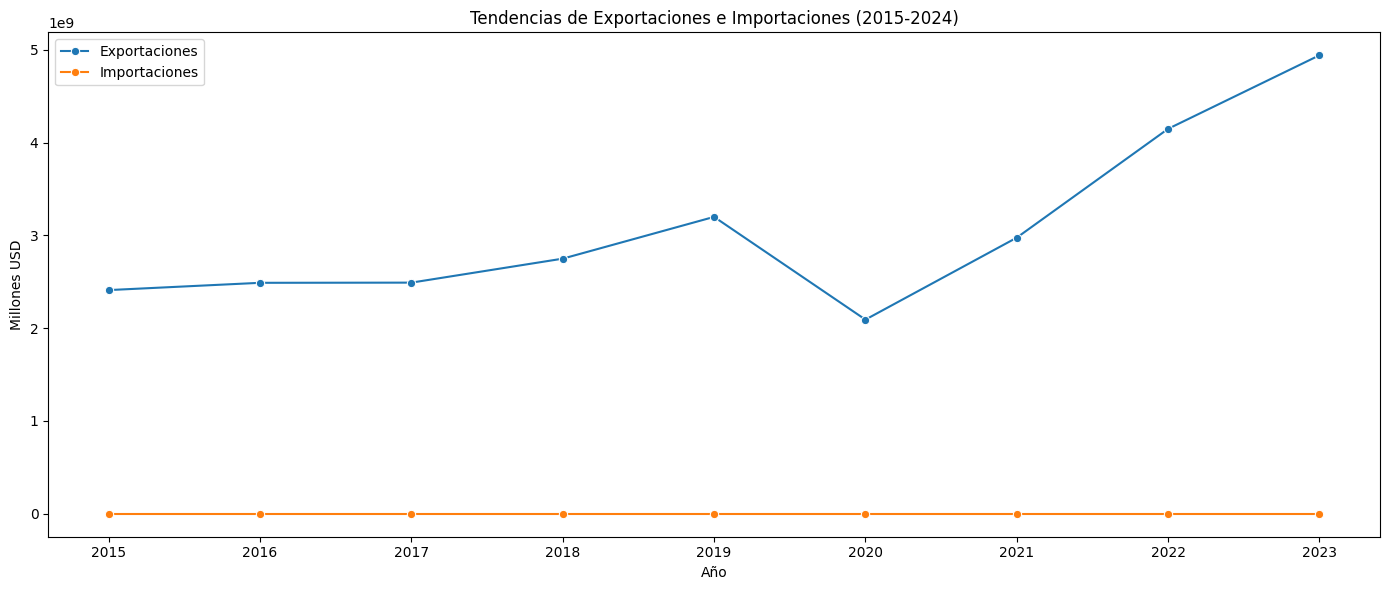

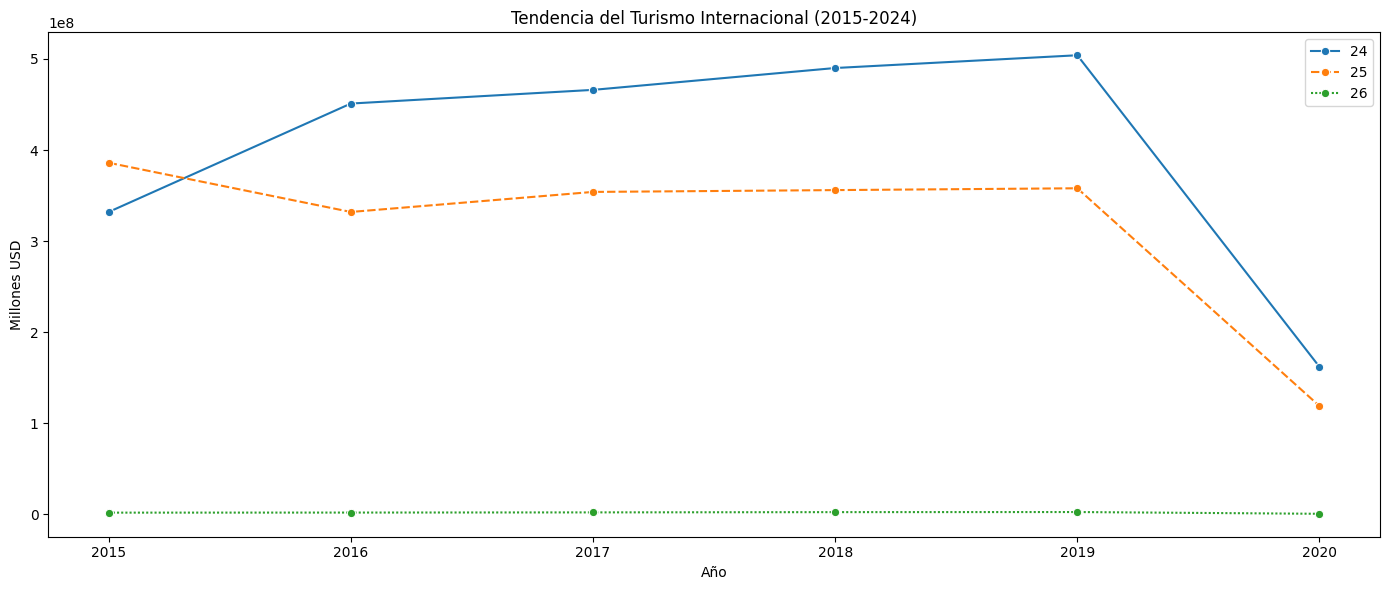

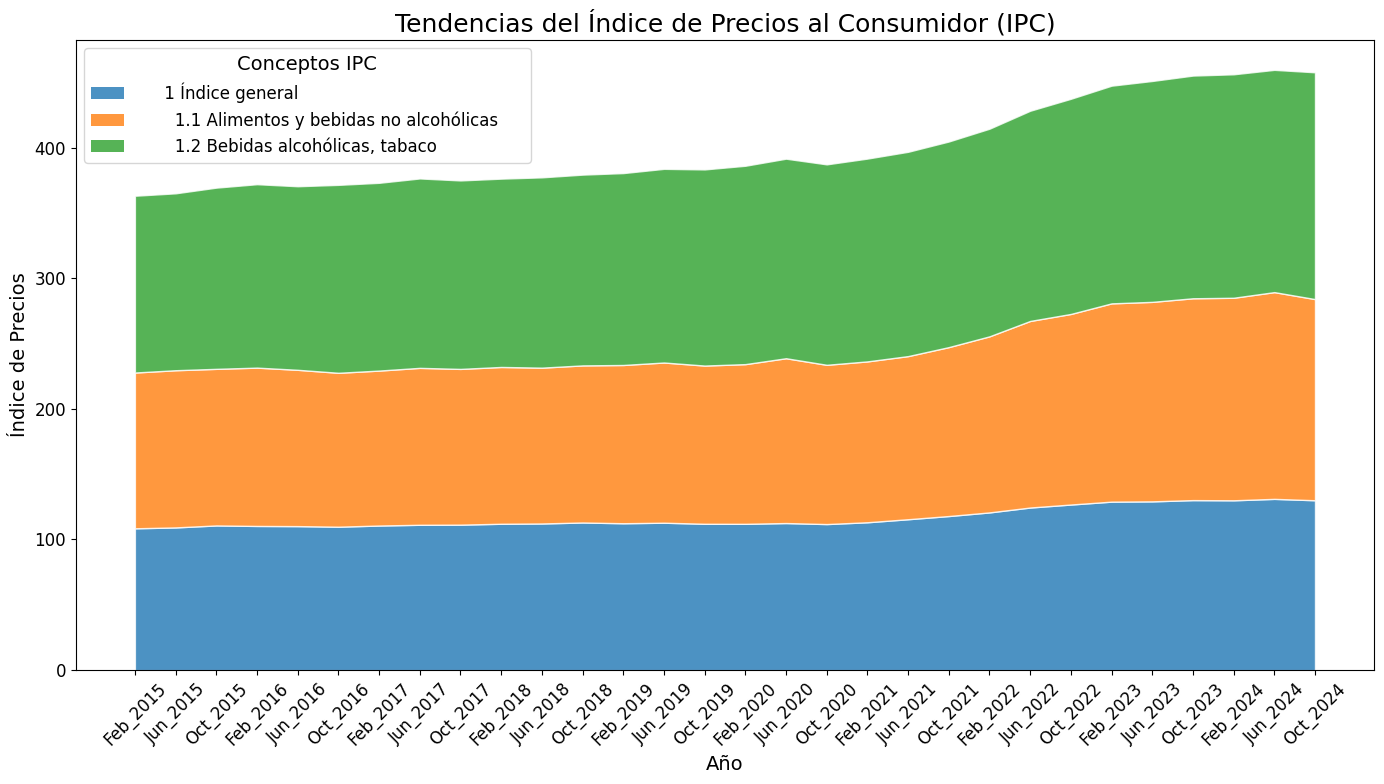